In [1]:
import numpy as np
import pandas as pd
from ESNmodel import EchoStateNetwork, ESNPipeline
from ESNplots import internalStatesHistogram, predictionAnalysis

In [2]:
from reservoirpy.datasets import mackey_glass
timeseries = mackey_glass(15000)
timeseries.shape


(15000, 1)

In [3]:
esn_params = {
    'inputSize': 1,
    'reservoirSize': 347,
    'outputSize': 1,
    'spectralRadius': 0.93,
    'inputScaling': 0.39,
    'leakingRate': 0.34,
    'sparsity': 0.77,
    'ridgeParam': 0.25,
    'activation': np.tanh,
    'feedback': False,
    'stateNoise': 0.0,
    'randomSeed': 42
}

In [4]:
pipeline = ESNPipeline(esn_params=esn_params)

In [5]:
predictions, actuals, metrics, internal_states = pipeline.run(
    timeseries,
    trainRatio=0.7,
    predictionHorizon=1,
    washout_train=100,
    washout_pred=0,
)

In [6]:
print(pd.DataFrame([metrics]))

        mse      rmse       mae     nrmse
0  0.000039  0.006212  0.002651  0.006904


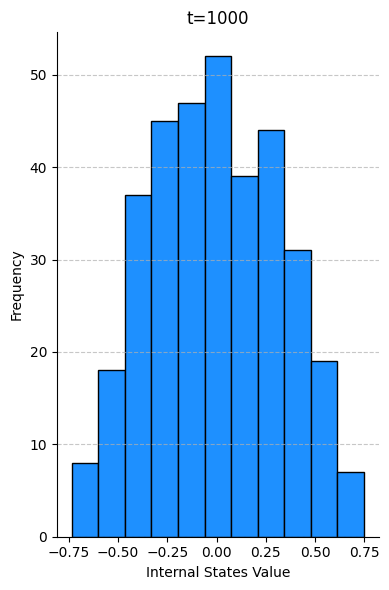

In [7]:
step_to_plot = 1000
if internal_states is not None and internal_states.shape[1] > step_to_plot :
    internalStatesHistogram(
        states=internal_states,
        time_step_index=step_to_plot,
        reservoir_size=esn_params['reservoirSize'],
    )

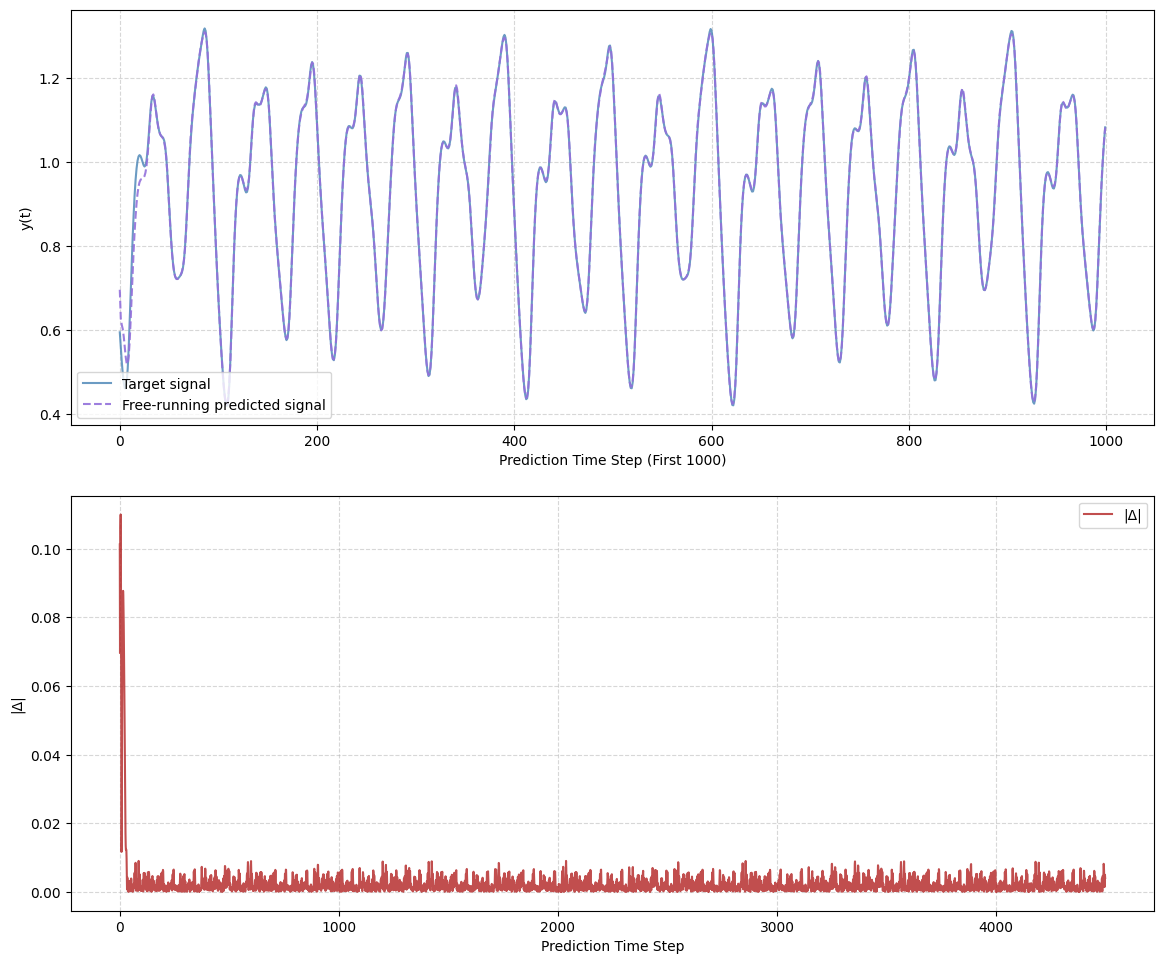

In [8]:
predictionAnalysis(
    predictions=predictions,
    actuals=actuals,
    zoom_limit=1000
)

In [9]:
from reservoirpy.datasets import henon_map
timeseries = henon_map(15000, a=1.4, b=0.3)
timeseries.shape

(15000, 2)

In [10]:
N_henon = timeseries.shape[1]

In [11]:
henon_esn_params = {
    'inputSize': N_henon,
    'reservoirSize': 300,
    'outputSize': N_henon,
    'spectralRadius': 0.9,
    'inputScaling': 0.4,
    'leakingRate': 0.3,
    'sparsity': 0.7,
    'ridgeParam': 1e-7,
    'activation': np.tanh,
    'feedback': False,
    'stateNoise': 0.0,
    'randomSeed': 456
}

In [12]:
pipeline = ESNPipeline(esn_params=henon_esn_params)
predictions, actuals, metrics, internal_states = pipeline.run(
    timeseries,
    trainRatio=0.7,
    predictionHorizon=1,
    washout_train=100,
    washout_pred=0,
)

In [13]:
print(pd.DataFrame([metrics]))

        mse   rmse       mae     nrmse
0  0.010609  0.103  0.005019  0.040279


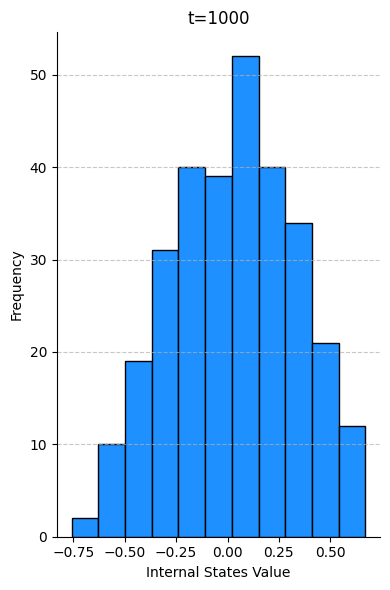

In [14]:
step_to_plot_henon = 1000
if internal_states is not None and internal_states.shape[1] > step_to_plot_henon :
    internalStatesHistogram(
        states=internal_states,
        time_step_index=step_to_plot_henon,
        reservoir_size=esn_params['reservoirSize'],
    )

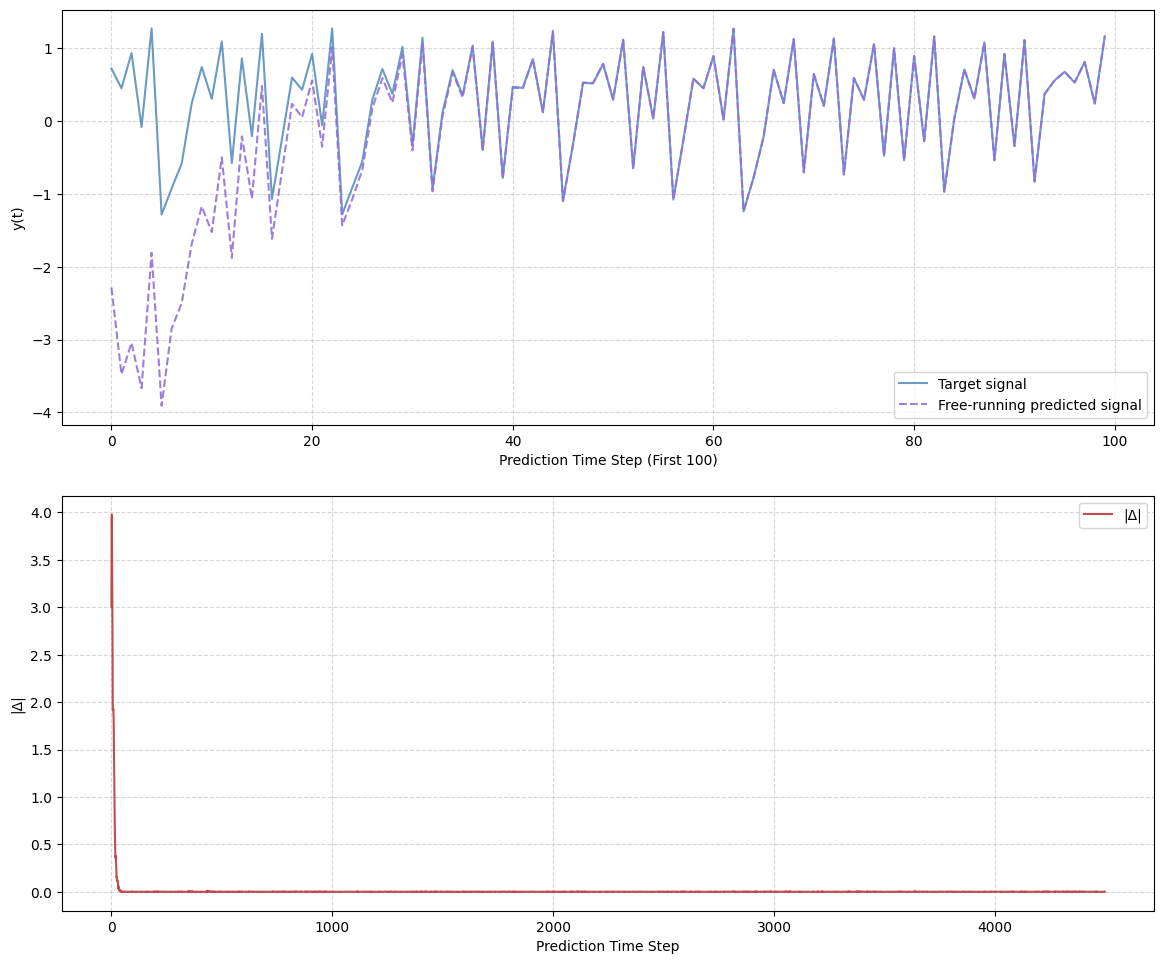

In [15]:
predictionAnalysis(
        predictions=predictions[:, 0],
        actuals=actuals[:, 0],
        zoom_limit=100
    )